In [24]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
# Let's take a look at our dataset real quick
# We'll see how our img/ directory is structure and how many images are in each
from pathlib import Path
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contenst"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

image_path = Path("./img/")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'img
There are 3 directories and 0 images in 'img/train
There are 0 directories and 826 images in 'img/train/detail
There are 0 directories and 826 images in 'img/train/install
There are 0 directories and 831 images in 'img/train/artwork
There are 3 directories and 0 images in 'img/test
There are 0 directories and 130 images in 'img/test/detail
There are 0 directories and 200 images in 'img/test/install
There are 0 directories and 200 images in 'img/test/artwork


Random image path: img/test/install/c1181.jpg
Random image class: install
Random image height: 798
Random image width: 1200


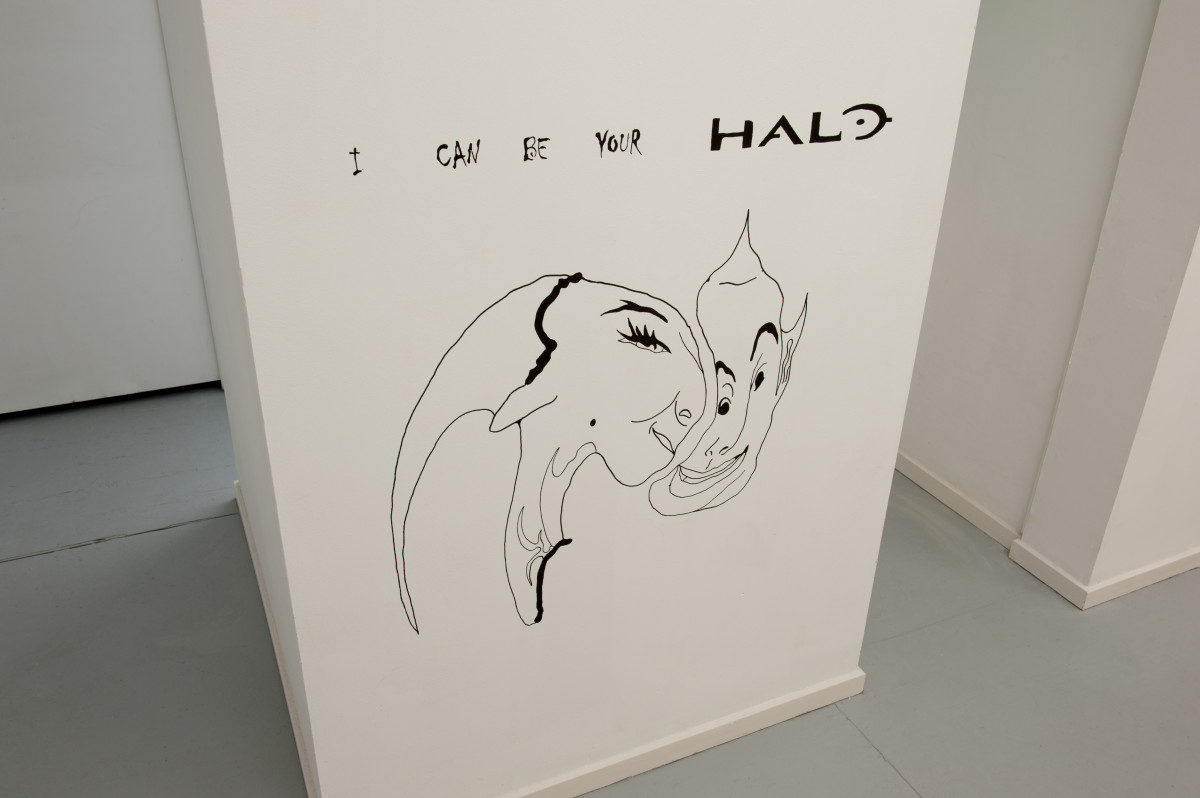

In [31]:
import random
from PIL import Image

#random.seed(2697)

# Set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"



# Display a random image
image_path_list = list(image_path.glob("*/*/*.jpg"))
rand_image_path = random.choice(image_path_list)

image_class = rand_image_path.parent.stem

img = Image.open(rand_image_path)
print(f"Random image path: {rand_image_path}")
print(f"Random image class: {image_class}")
print(f"Random image height: {img.height}")
print(f"Random image width: {img.width}")
img

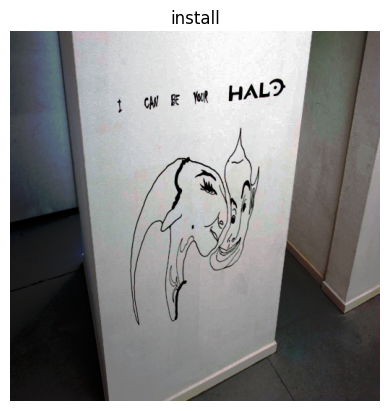

In [39]:
# Let's create a transform for our data to try to regularize it
# We will need to resize, do some random flipping, and cast it to a tensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# We are choosing 512x512 now, this might need to be scaled depending on GPU demands
train_transform = transforms.Compose([
    transforms.Resize(size=(512,512)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(512,512)),
    transforms.ToTensor()
])

tensor_img = train_transform(img)
tensor_img_permute = tensor_img.permute(1,2,0)
plt.title(image_class)
plt.axis("off")
plt.imshow(tensor_img_permute);


In [40]:
# Load data to a custom dataset - ImageFolder style

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=test_transform,
                                  target_transform=None)

class_names = train_data.classes
class_names

['artwork', 'detail', 'install']

In [41]:
# Turn this into a DataLoader

BS = 32

train_dl = DataLoader(dataset=train_data,
                      batch_size=BS,
                      num_workers=os.cpu_count(),
                      shuffle=True)
test_dl = DataLoader(dataset=test_data,
                      batch_size=BS,
                      num_workers=os.cpu_count(),
                      shuffle=True)

In [43]:
img, label = next(iter(train_dl))

print(f"Image Shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label Shape: {label.shape}")
label[0]

Image Shape: torch.Size([32, 3, 512, 512]) -> [batch_size, color_channels, height, width]
Label Shape: torch.Size([32])


tensor(1)